
# Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a regression activity.

## Workflow
1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Data preparation, according to background information
    1. Set the __target__ variable, according to background information
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable* 
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [2]:
# Code source: Claudio Sartori 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load the dataset from a `.csv` file and show a short description

In [7]:
df = pd.read_csv("regression_example.csv")
df

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
0,0,1.509081,-1.049118,1.978885,1.060733,NaN,0.824655,0.819409,-1.157708,214.593802
1,1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189
...,...,...,...,...,...,...,...,...,...,...
838,838,-1.282938,-0.504848,1.171113,NaN,1.961343,1.332555,-1.149328,-2.325523,43.141579
839,839,-1.389938,0.558426,0.190860,0.104489,0.539604,0.098193,-1.218202,3.000174,-117.364188
840,840,-0.059721,-0.293473,NaN,0.490220,-1.614495,1.029973,0.267280,-0.225370,48.715272
841,841,1.207762,-0.886375,0.975833,0.001994,-1.665587,1.435412,0.773876,-1.107348,85.057068


## Data Exploration and preparation

##### Show a short description of the columns

In [ ]:
df.describe()

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
count,843.000000,802.000000,807.000000,812.000000,8.020000e+02,805.000000,808.000000,806.000000,812.000000,813.000000
mean,421.000000,-0.037473,0.008466,-0.059965,9.616777e-01,-0.093113,0.034653,-0.019928,-0.034976,3.798356
std,243.497433,1.038115,0.973884,0.991280,1.286476e+00,1.050385,0.957238,0.997345,0.963010,114.189124
min,0.000000,-3.700229,-2.832440,-4.141473,2.007427e-08,-4.072767,-2.968219,-2.850505,-3.948627,-358.659591
25%,210.500000,-0.723630,-0.640017,-0.681924,8.725649e-02,-0.802553,-0.625219,-0.689671,-0.662887,-73.823652
50%,421.000000,-0.032953,0.005693,-0.050789,4.707895e-01,-0.090512,0.051123,-0.014592,-0.049392,-0.159154
75%,631.500000,0.629368,0.681480,0.587393,1.350123e+00,0.611545,0.689203,0.612939,0.614423,75.487094
max,842.000000,3.043062,2.945731,2.925432,9.200073e+00,3.024952,3.210373,2.861549,3.000174,422.794685


##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [42]:
len(df) - len(df.dropna())

273

#### Drop data that are useless or not usable

In [ ]:
df_nna = df.dropna()

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
1,1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189
5,5,-0.635465,-1.112850,-0.330580,6.141348,1.914527,0.408895,-0.364722,-0.731382,-261.116572
...,...,...,...,...,...,...,...,...,...,...
835,835,-0.192818,0.250540,0.755751,0.476514,-2.240387,0.135056,0.655923,0.066790,125.436986
836,836,-0.321246,0.235328,-2.367329,0.409559,0.347440,-0.484621,0.276540,0.904721,-106.609115
839,839,-1.389938,0.558426,0.190860,0.104489,0.539604,0.098193,-1.218202,3.000174,-117.364188
841,841,1.207762,-0.886375,0.975833,0.001994,-1.665587,1.435412,0.773876,-1.107348,85.057068


In [24]:
df_nna.head(5)

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
1,1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189
5,5,-0.635465,-1.112850,-0.330580,6.141348,1.914527,0.408895,-0.364722,-0.731382,-261.116572


## Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [36]:
target = "response"
X = df_nna.drop([target, "idx"], axis=1)
print(X.head(6))

y = df_nna[target]
y.head(6)

         F0        F1        F2        F3        F4        F5        F6  \
1  0.644764  0.007172  0.004493  4.168748 -0.622817  1.855366 -0.540468   
2  0.890241  1.080162  0.168031  0.002733  0.522478  0.407804  1.629592   
3 -0.212410 -1.034267  1.843441  4.486992 -0.610050  0.734101 -0.142660   
4 -0.827402 -2.048496 -0.066242  1.361695  1.268456 -1.084906  1.986556   
5 -0.635465 -1.112850 -0.330580  6.141348  1.914527  0.408895 -0.364722   
7 -0.847400 -1.151567 -0.496428  0.275847 -1.754899  1.663900 -2.114179   

         F7  
1  1.141118  
2 -1.102599  
3 -0.172119  
4  0.425511  
5 -0.731382  
7  1.194341  


1    151.951717
2    117.280863
3    229.358473
4    230.153189
5   -261.116572
7   -210.479262
Name: response, dtype: float64

## Show the two dimensional scatter plots for all the predicting variables with respect to the target

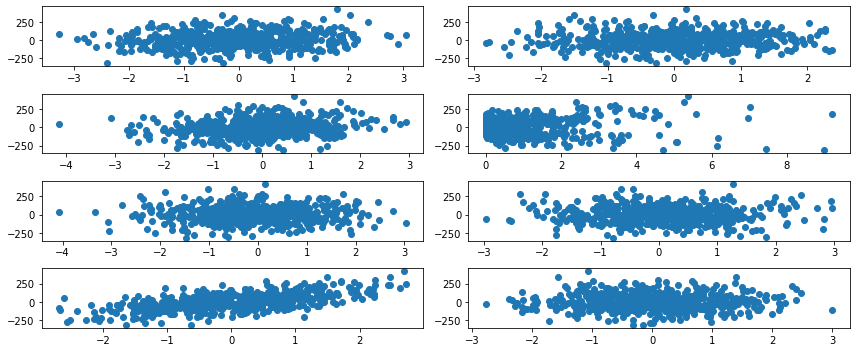

In [62]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 5))
n = 0
for i in range(0, 4):
    for j in range(0, 2):
        x = X["F" + str(n)]
        axes[i, j].scatter(x, y)
        n += 1
        
plt.tight_layout()
plt.show()


<Axes: >

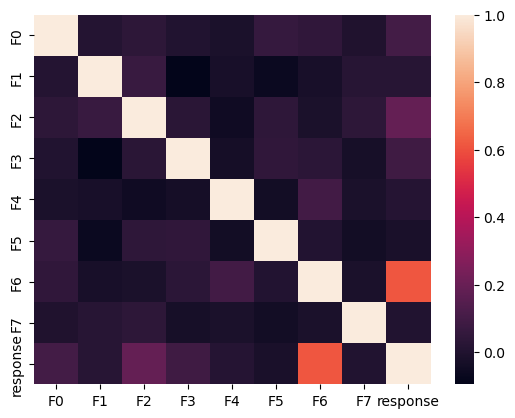

## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


Training set and test set have 399 and 171 elements respectively


## 2. First experiment - univariate linear regression
We choose the variable exhibiting the highest correlation with respect to the target

Consider a reduced dataset containing the chosen variable and the target

### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

#### Compute the quality measures

## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

,Variable,Coefficient
0,F0,9.225329
1,F1,2.794846
2,F2,21.766171
3,F3,3.299594
4,F4,-5.532386
5,F5,-6.002884
6,F6,72.949625
7,F7,-2.675824


#### Compute the quality measures

## Decision Tree Multivariate Regression

In [19]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

The maximum depth of the full Decision Tree Regressor is 22


#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [21]:
from sklearn.model_selection import GridSearchCV


The optimal maximum depth for the decision tree is 2


Decision Tree Regression - RMSE = 89.83


#### Show the tree

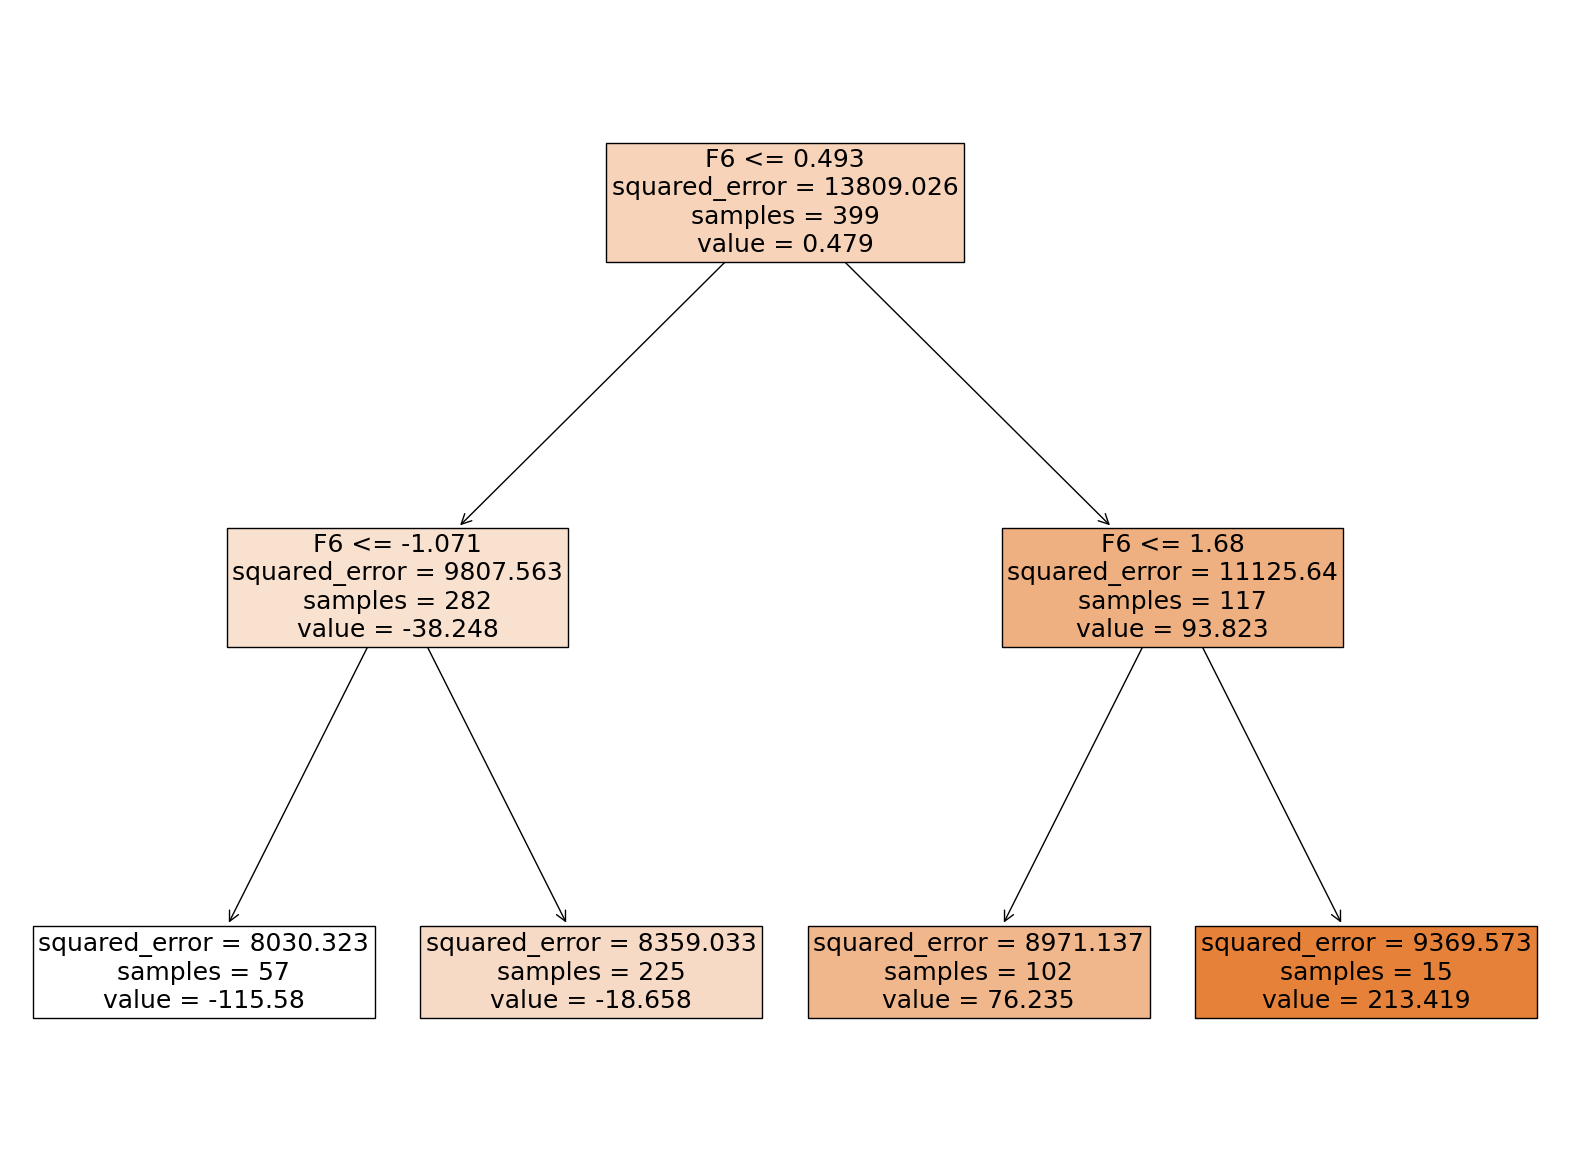

In [23]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure


## Random Forest Multivariate Regresson

In [24]:
# Create Random Forest regression object
from sklearn.ensemble import RandomForestRegressor


The optimal maximum depth for the trees in the random forest is 3


Random Forest Regression - RMSE = 84.70


### Plot the prediction of every model, using as x axis the predicting variable used in the first experiment, compare the predction with the real test set, and print the metrics $R^2$ and RMSE 

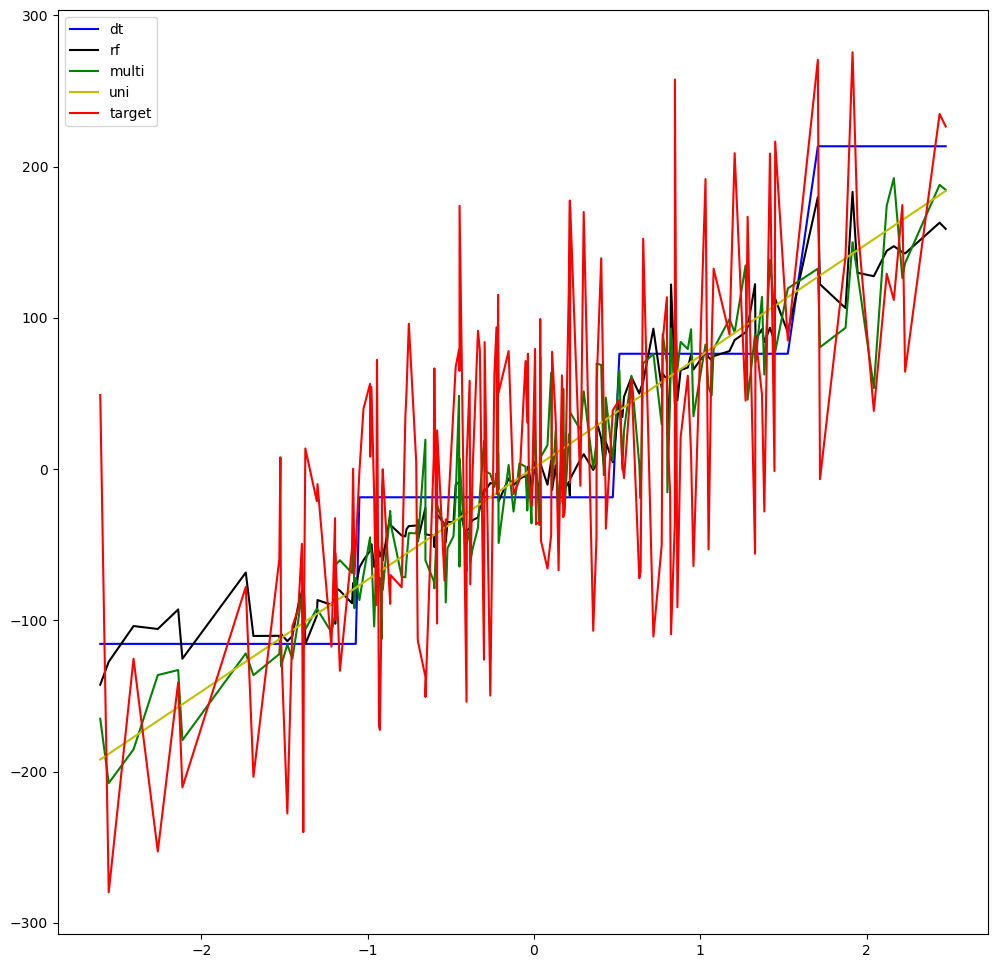

,Model,RMSE,R_square
0,Linear Univariate on F6,85.122,0.338
1,Linear Multivariate,81.104,0.399
2,Decision Tree Regressor,89.827,nan
3,Random Forest Regressor,84.701,nan


## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 

### Decision Tree and Random Forest regression
- Decision Tree and Random Forest have an RMSE slightly higher than multivariate linear regression



## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with other columns and comment the results